# E-COMMERCE - CHURN ANALYSIS AND PREDICTION

#### Analyst: Jose Alejandro Calle

In the fiercely competitive landscape of business, understanding and mitigating customer churn has become a paramount concern for organizations across various industries. Customer churn, or the rate at which customers cease their engagement with a business, can have profound financial implications and can significantly impact a company's bottom line. Recognizing this, companies are increasingly turning to data analytics to delve deeper into the dynamics of customer churn.

In this analysis, I embark on a comprehensive exploration of churn, utilizing data from a dataset found on Kaggle. My objective is two-fold: to dissect the patterns of churn as univariable and bivariable analysis, and to employ predictive modeling techniques to forecast instances of churn and no churn.

My journey begins with a univariable analysis, wherein we examine the individual characteristics that may influence churn. I delve into key variables such as gender, customer complaints, and satisfaction scores. By scrutinizing these variables in isolation, I aim to discern any discernible trends or patterns that could shed light on what drives customers to stay or leave.

Moving forward, we transition into a bivariable analysis. In this phase, I probe the relationships between different pairs of variables, seeking correlations that can provide insights into the complex interplay of factors contributing to churn. Are there intriguing connections between satisfaction scores and preferred genres? Does the presence of customer complaints reveal patterns in churn behavior? Our exploration is driven by these questions.

Ultimately, my journey culminates in predictive modeling. Armed with insights from my univariable and bivariable analyses, I employ machine learning techniques to build models that can predict whether a customer is likely to churn or remain loyal. These models leverage important variables and patterns uncovered during my analytical journey. By making accurate predictions, businesses can proactively intervene to retain customers, thereby bolstering their growth prospects and bolstering customer satisfaction.

In summary, this churn analysis venture seeks to unravel the enigma of customer churn using data-driven methodologies. By studying the various facets of churn, from individual variables to intricate relationships, and harnessing the predictive power of machine learning, we aim to equip businesses with actionable insights to thrive in an ever-evolving marketplace.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the data

ecommerce = pd.read_csv('E-Commerce Churn Data.csv')
ecommerce

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [3]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
ecommerce.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [5]:
# Number of rows
len(ecommerce)

5630

In [6]:
# Number of columns
len(ecommerce.columns)

20

In [7]:
# Name of columns
ecommerce.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [8]:
ecommerce.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [9]:
# Is there any duplicates?
ecommerce.duplicated().sum()

0

In [10]:
# Lets check the value counts of each categorical variables
for i in ecommerce.columns:
    if ecommerce[i].dtypes == 'object':
        print(i)
        print()
        print('The values are:')
        print(ecommerce[i].value_counts())
        print()
        print()

PreferredLoginDevice

The values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

The values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

The values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

The values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

The values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




There are five categorical columns: PreferredLoginDevice, PreferredPaymentMode, Gender, MaritalStatus

In [11]:
# To count which variable has nan and how many
columns_with_nan= []

for column in ecommerce.columns:
    unique_values= ecommerce[column].unique()
    nan_count= ecommerce[column].isna().sum()
    
    if nan_count > 0:
        columns_with_nan.append(column)
        
    print(f'Unique values for {column} is:', unique_values)
    print(f'NaN count for {column} is: {nan_count}')
    print()
    
    if columns_with_nan:
        print(f'Columns with NaN values: {columns_with_nan}')
    else:
        print('No columns have any NaN values')


Unique values for CustomerID is: [50001 50002 50003 ... 55628 55629 55630]
NaN count for CustomerID is: 0

No columns have any NaN values
Unique values for Churn is: [1 0]
NaN count for Churn is: 0

No columns have any NaN values
Unique values for Tenure is: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
NaN count for Tenure is: 264

Columns with NaN values: ['Tenure']
Unique values for PreferredLoginDevice is: ['Mobile Phone' 'Phone' 'Computer']
NaN count for PreferredLoginDevice is: 0

Columns with NaN values: ['Tenure']
Unique values for CityTier is: [3 1 2]
NaN count for CityTier is: 0

Columns with NaN values: ['Tenure']
Unique values for WarehouseToHome is: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
NaN count for WarehouseToHome is: 251

Colum

## Cleaning missing values

In [12]:
# Lets duplicate the data to preserving the original data without altering the missing values or NaN
ecommerce_copy= ecommerce.copy()

In [13]:
# Lets drop the first column: CustomerID
ecommerce.drop(['CustomerID'], axis= 1, inplace= True)
ecommerce

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [14]:
# Looking if there are any nulls
null_counts= ecommerce.isnull().sum()

#filtering columns with null values. just show the columns with nulls and the quantity
columns_with_nulls= null_counts[null_counts > 0]

print(f'Columns with null values are:')
print(columns_with_nulls)

Columns with null values are:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


In [15]:
# Filling the nulls with the median
for column in columns_with_nulls.index:
    median= ecommerce[column].median()
    ecommerce[column].fillna(median, inplace= True)

In [16]:
ecommerce.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

We filled up the nulls with the median of each column. We can see that there are not nulls anymore.

## Treating the Outliers

We must clean and treat the Outliers. The importance of this is in reason of improve the overall quality and accuracy of the data, to obtain more reliable statical results, lead to better model performance, better understanding the underlying patterns in the data, lead to more visually appealing and informative visualizations, among others.
To represent the outliers we are using the box to mark outliers displaying the statistics, but also provides more detailed view of the data distribution by showing its shape through morrored.

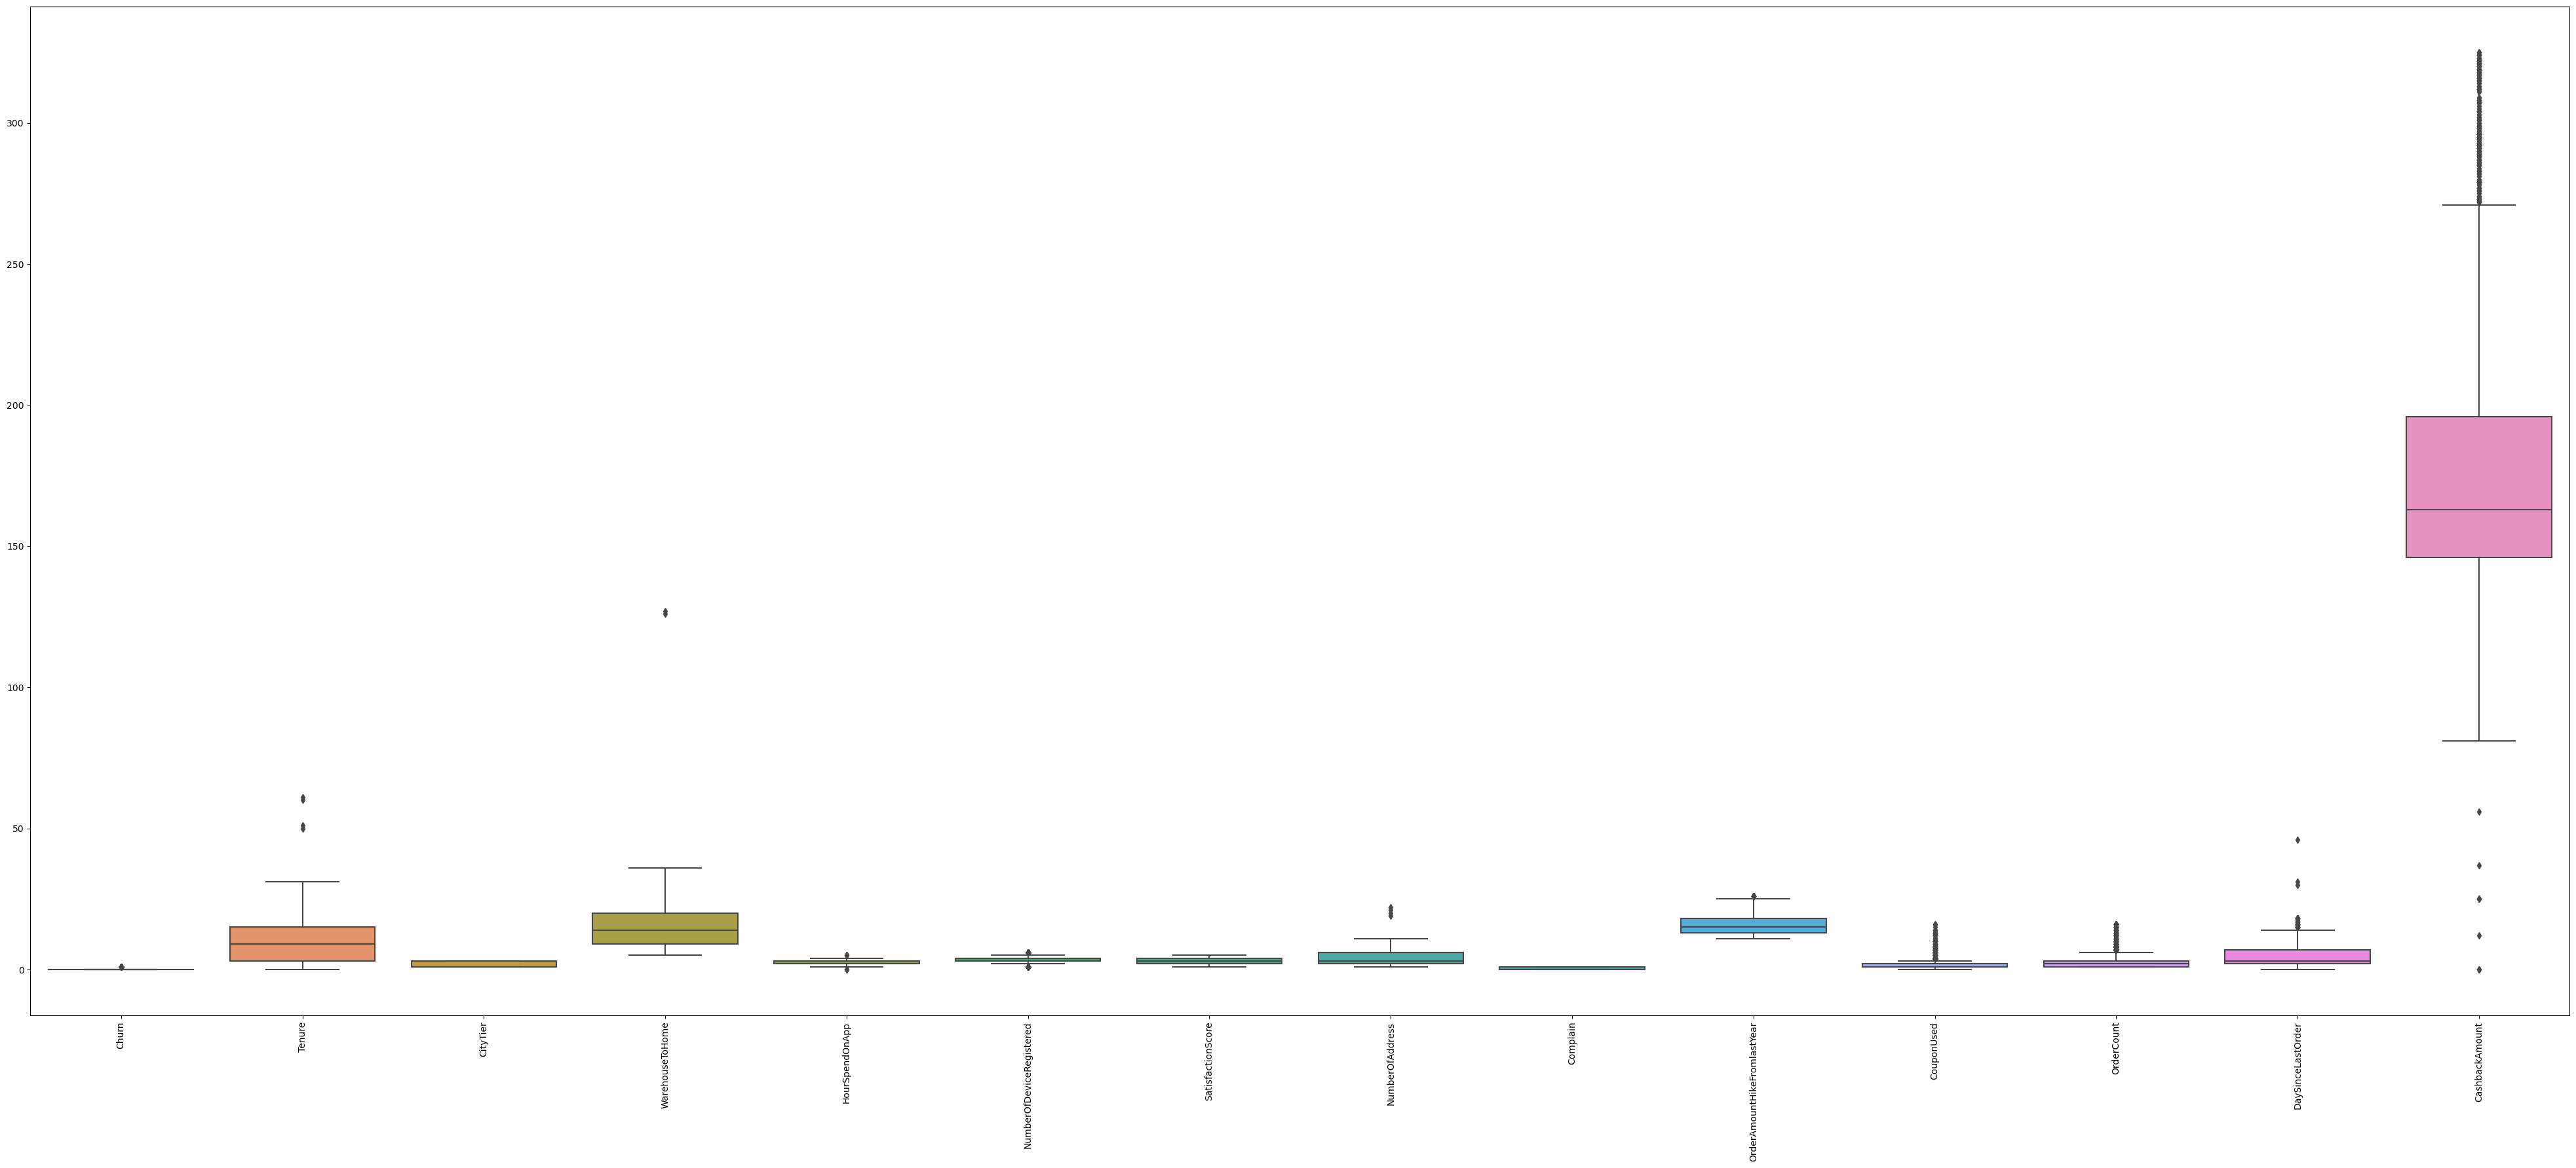

In [17]:
# Lets visualize the outliers through the box chart.

numerical_columns = ecommerce.select_dtypes(include='number')
plt.figure(figsize=(50,20))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=90)
plt.show()


There are outliers in almost all of the variables. According to this, we are going to remove data points that are considered outliers.

In [18]:
#Lets clean it by IQR method
def remove_outliers(ecommerce,column):
    Q1, Q3= ecommerce[column].quantile([0.25, 0.75])
    IQR= Q3- Q1
    lower_bound= Q1 - 1.5* IQR
    upper_bound= Q3 + 1.5* IQR
    return lower_bound, upper_bound

In [19]:
ecommerce['Churn'] = ecommerce['Churn'].astype('object')
ecommerce['CityTier'] = ecommerce['CityTier'].astype('object')

In [20]:
for column in ecommerce.columns:
    if ecommerce[column].dtype != 'object': 
        lower_bound,upper_bound=remove_outliers(ecommerce, column)
        ecommerce[column]=np.where(ecommerce[column]>upper_bound,upper_bound,ecommerce[column])
        ecommerce[column]=np.where(ecommerce[column]<lower_bound,lower_bound,ecommerce[column])

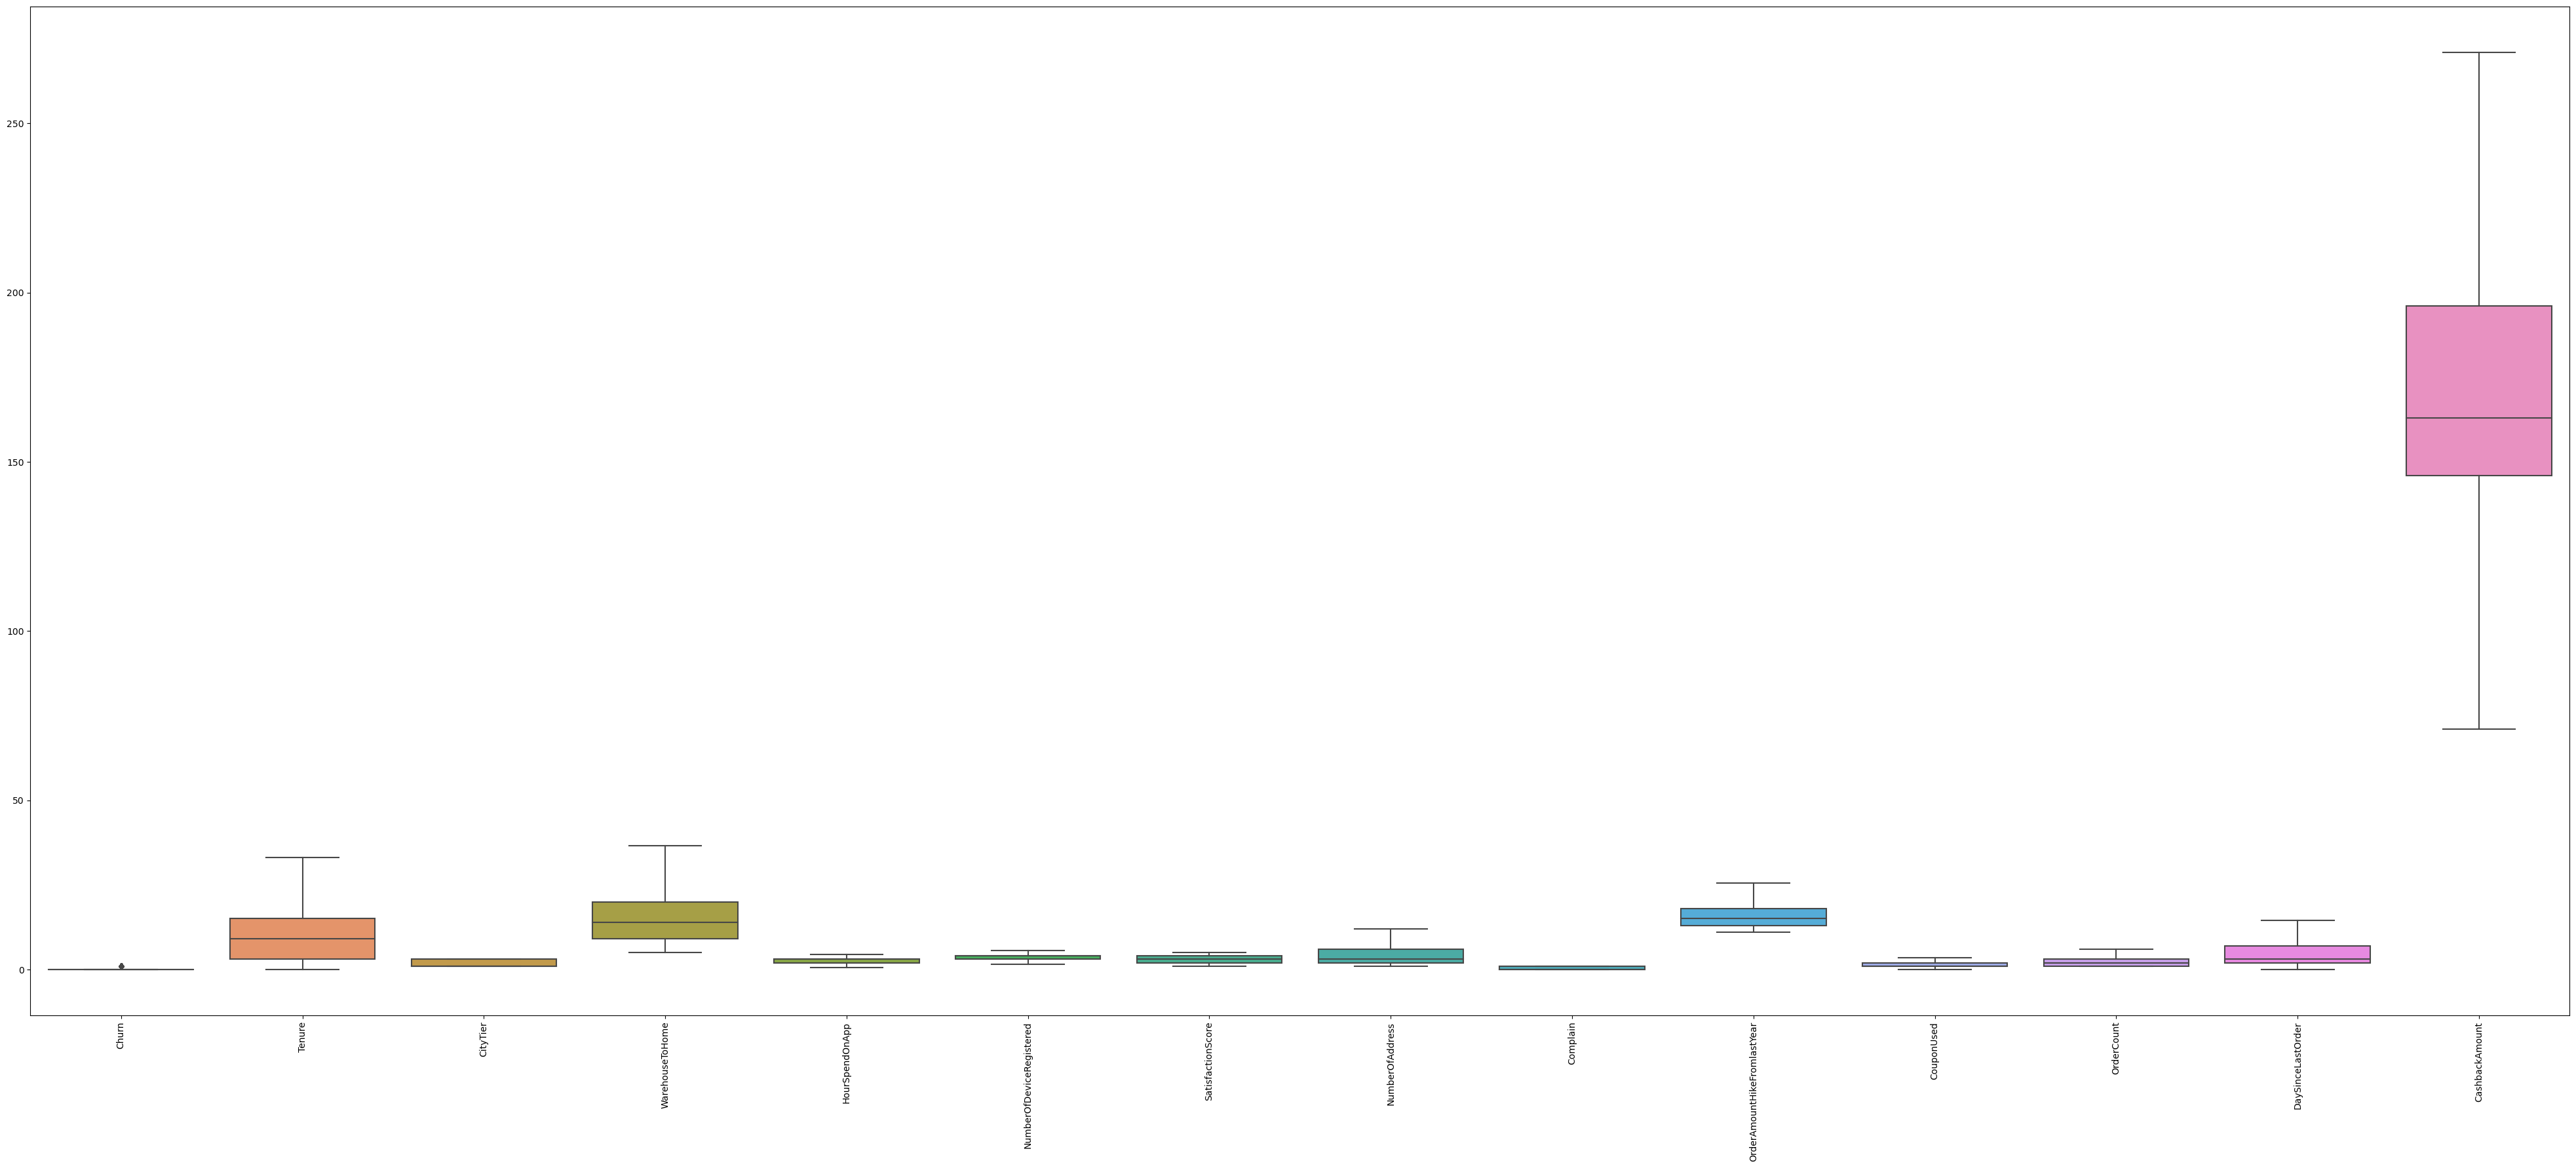

In [21]:
# plotting the ecommerce cleaned

plt.figure(figsize=(50, 20))
sns.boxplot(data=ecommerce)
plt.xticks(rotation=90)
plt.show()

## Exploratory analisis

We're about to explore the data by univariable and then by multivariables. 
By univariable it's important to understand the target variable (churn), then we need to divide variables into categorical and numerical. 
Then by multivariable analysis, we're about to analyze the correlation between the numeric variables usin matrix or heatmap to identify significant relationship, then creating stacked bar plots for categorical variables to visualize the relationships between those, and finishing trying to analyze the relation between churn and other variables such as payment mode, city tier, gender, among others.

### Univariable analysis

#### Churn

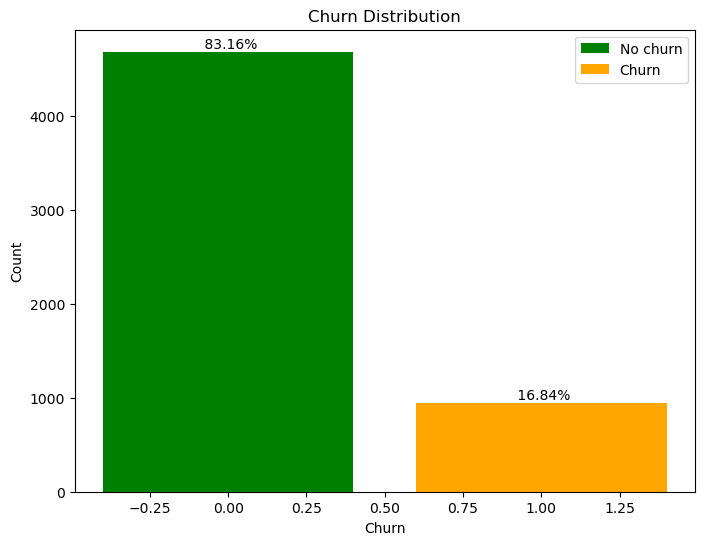

In [22]:
# we need first understand the churn
churn_counts= ecommerce['Churn'].value_counts()

# Define the legend
labels= ['No churn', 'Churn']

#plotting
plt.figure(figsize=(8, 6))
bars= plt.bar(churn_counts.index, churn_counts.values, color=['green', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

total_count= len(ecommerce)
for i, count in enumerate(churn_counts):
    percentage= (count/ total_count)* 100
    plt.annotate(f'{percentage: 0.2f}%', (i, count), ha= 'center', va= 'bottom')
   
plt.legend(bars, labels)

plt.show()

Before starting this graph analysis, we need to understand firslty what is churn.
Churn is a crucial metric for businesses which refers to the rate at which customers or subscribers stop using a product or service and, in many cases, switch to a competitor's offering.

According to this, we can see that the churn (people who stopped using a service or product) is the 16,84%, while the no churn is the 83,16%. That means, so far, that there is a greater amount of consumer satisfaction and loyality with the business.

#### Dividing between numeric  and categories

In [23]:
# Split columns into categories and numerics
category_columns = ecommerce.select_dtypes(include=['object']).columns
numeric_columns = ecommerce.select_dtypes(exclude=['object']).columns

print("Categorical Columns:")
print(category_columns)
print("\nNumeric Columns:")
print(numeric_columns)

Categorical Columns:
Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

Numeric Columns:
Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [24]:
ecommerce[category_columns].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [25]:
for i in category_columns:
    print(i)
    print()
    print(ecommerce[i].value_counts())
    print()
    print()

Churn

0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [26]:
ecommerce[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.0,3.0,9.0,15.0,33.0
WarehouseToHome,5630.0,15.534813,8.089328,5.0,9.0,14.0,20.0,36.5
HourSpendOnApp,5630.0,2.934636,0.703826,0.5,2.0,3.0,3.0,4.5
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.5,3.0,4.0,4.0,5.5
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.207993,2.555111,1.0,2.0,3.0,6.0,12.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.0,13.0,15.0,18.0,25.5
CouponUsed,5630.0,1.440409,1.071295,0.0,1.0,1.0,2.0,3.5
OrderCount,5630.0,2.520604,1.711109,1.0,1.0,2.0,3.0,6.0


In [27]:
for i in numeric_columns:
    print(i)
    print()
    print(ecommerce[i].value_counts().sort_index(ascending= True))
    print()
    print()

Tenure

0.0     508
1.0     690
2.0     167
3.0     195
4.0     203
5.0     204
6.0     183
7.0     221
8.0     263
9.0     511
10.0    213
11.0    194
12.0    182
13.0    181
14.0    176
15.0    159
16.0    149
17.0    106
18.0    123
19.0    140
20.0    109
21.0     84
22.0     76
23.0     89
24.0     75
25.0     59
26.0     60
27.0     66
28.0     70
29.0     55
30.0     66
31.0     49
33.0      4
Name: Tenure, dtype: int64


WarehouseToHome

5.0       8
6.0     295
7.0     389
8.0     444
9.0     559
10.0    274
11.0    233
12.0    221
13.0    249
14.0    550
15.0    288
16.0    322
17.0    217
18.0     89
19.0     75
20.0     74
21.0     85
22.0    104
23.0     96
24.0     85
25.0     86
26.0     89
27.0     81
28.0     71
29.0     81
30.0     94
31.0    101
32.0     94
33.0     67
34.0     63
35.0     93
36.0     51
36.5      2
Name: WarehouseToHome, dtype: int64


HourSpendOnApp

0.5       3
1.0      35
2.0    1471
3.0    2942
4.0    1176
4.5       3
Name: HourSpendOnApp, dtype:

### Multivariable Analysis

#### Correlation

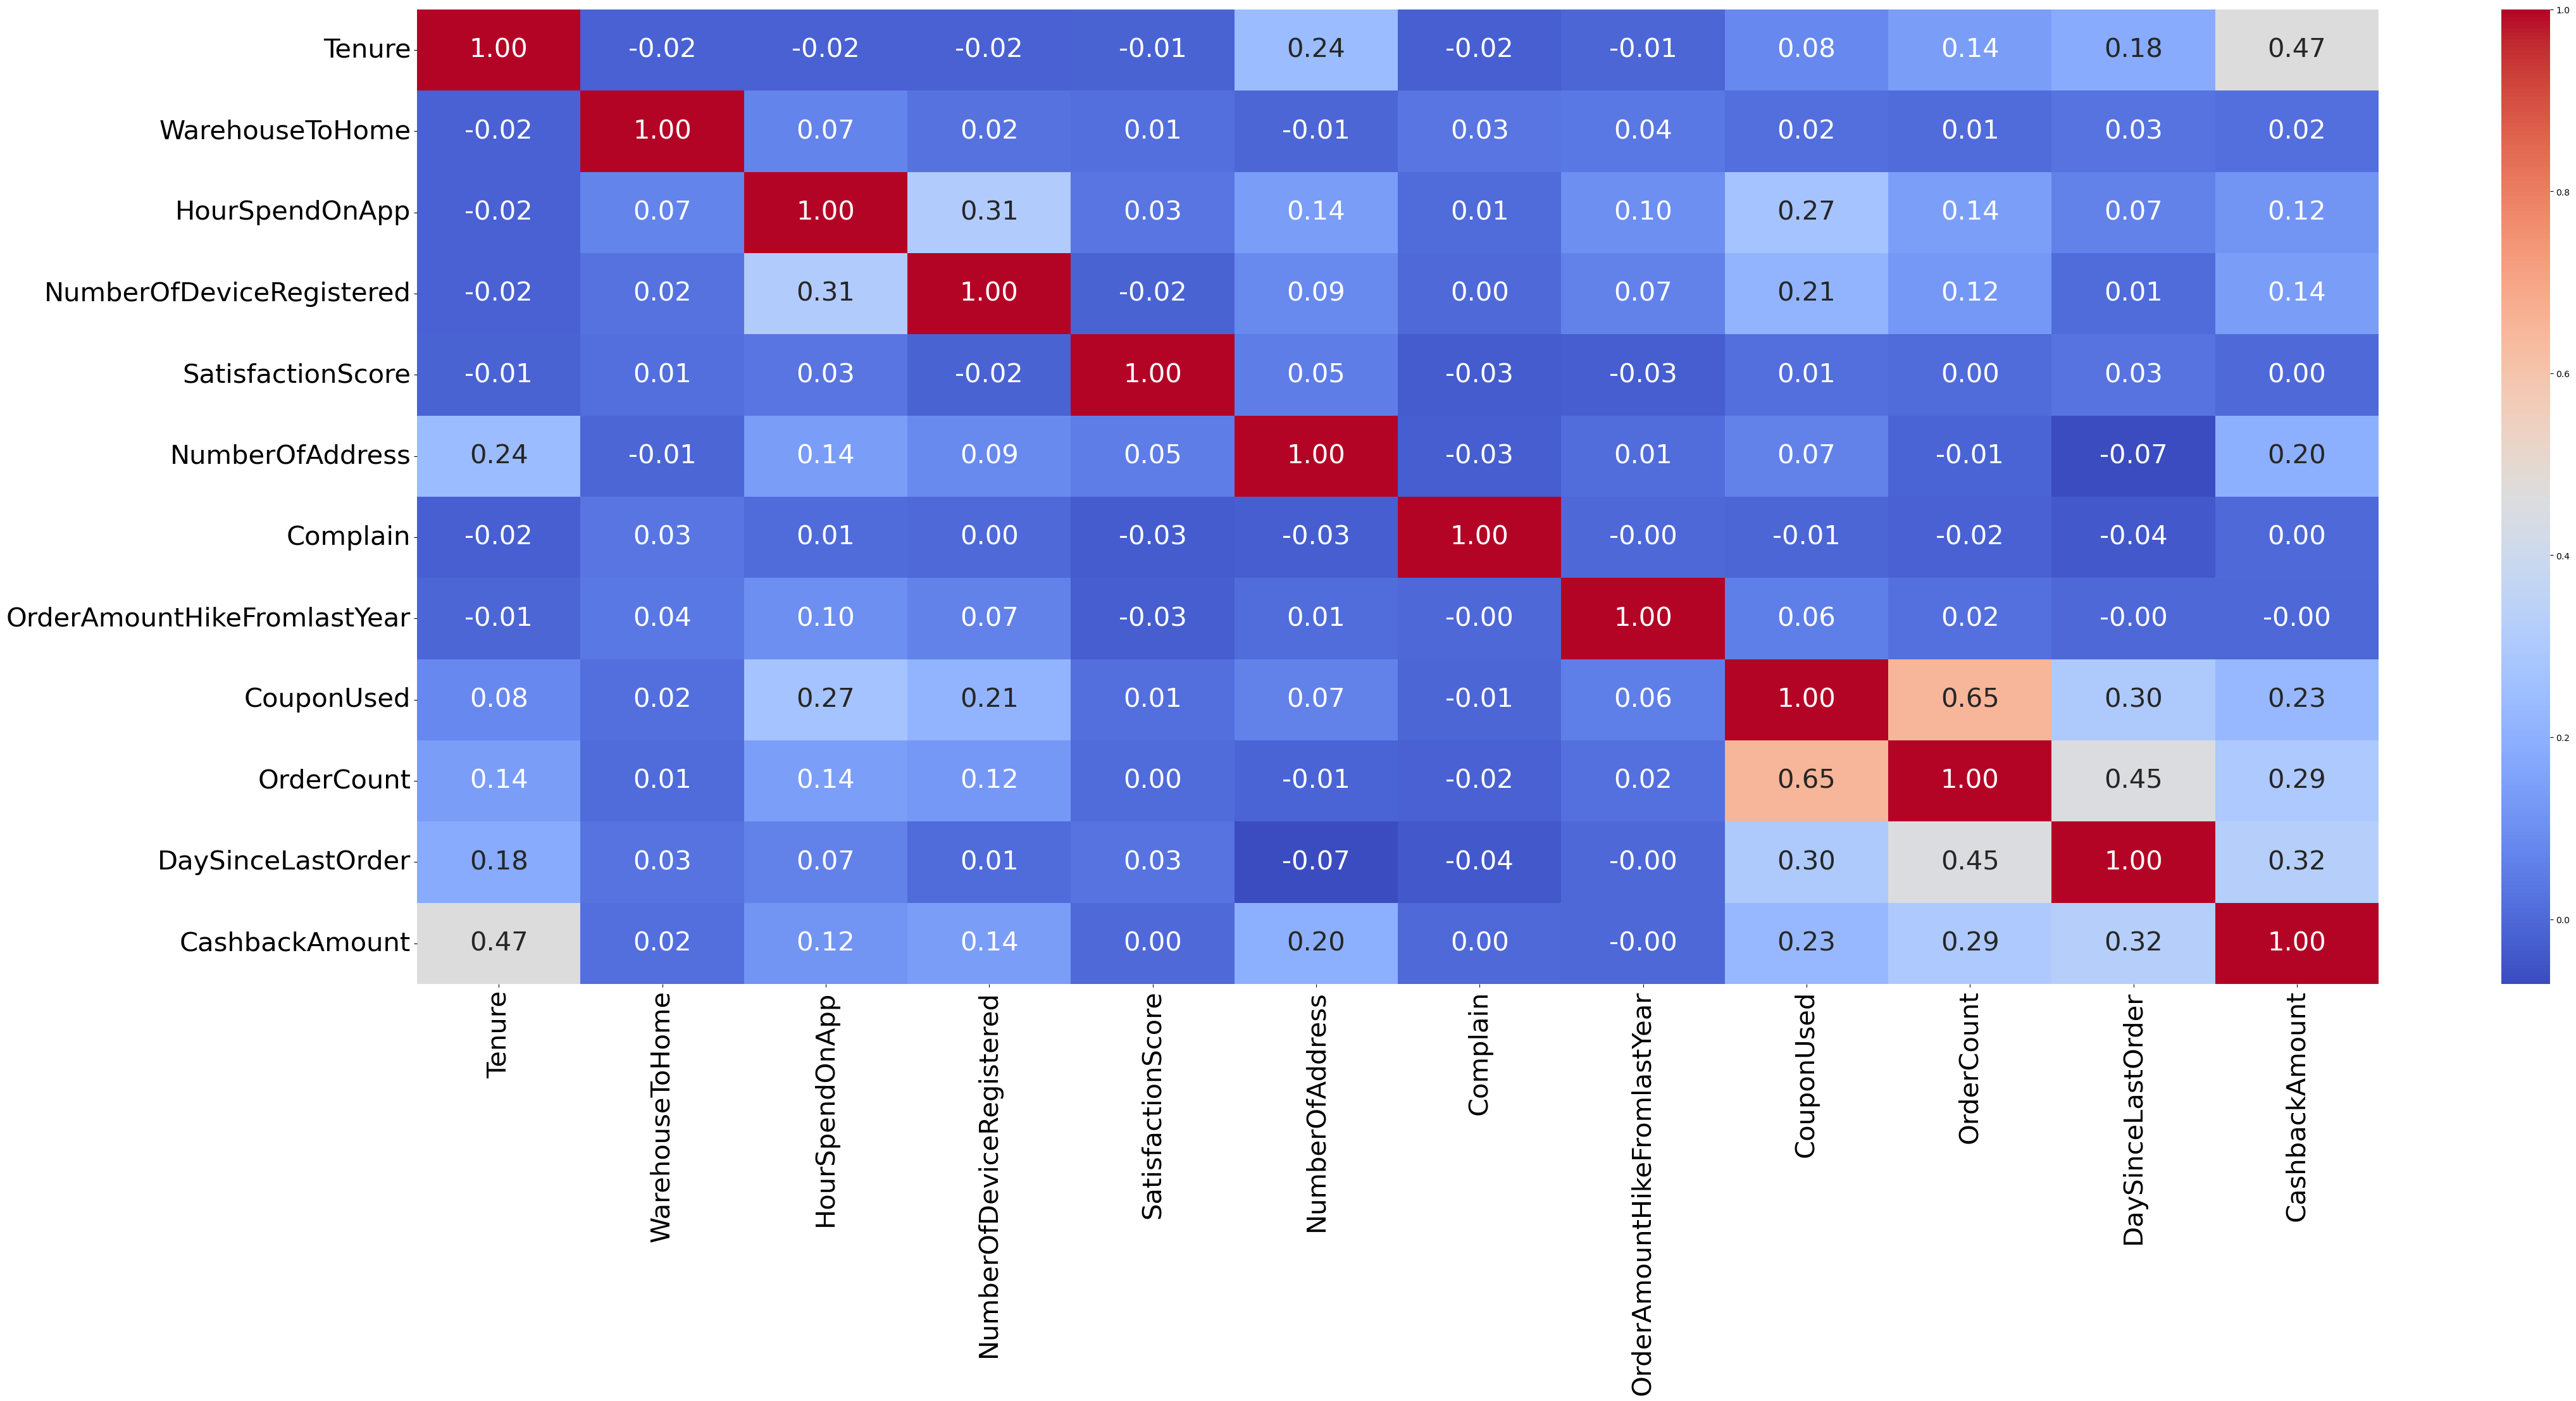

In [28]:
# Visualize the correlation

plt.figure(figsize=(50,20))
heatmap= sns.heatmap(ecommerce.corr(), cmap= 'coolwarm', annot= True, fmt= '.2f', annot_kws= {'size': 30})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30, rotation= 90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30)
plt.show()

It exist a moderate correlation between CouponUsed and OrderCount.

#### Do the gender, complain and satisfaction score, have a significant impact on their likelihood to churn?

##### Gender Vs Churn

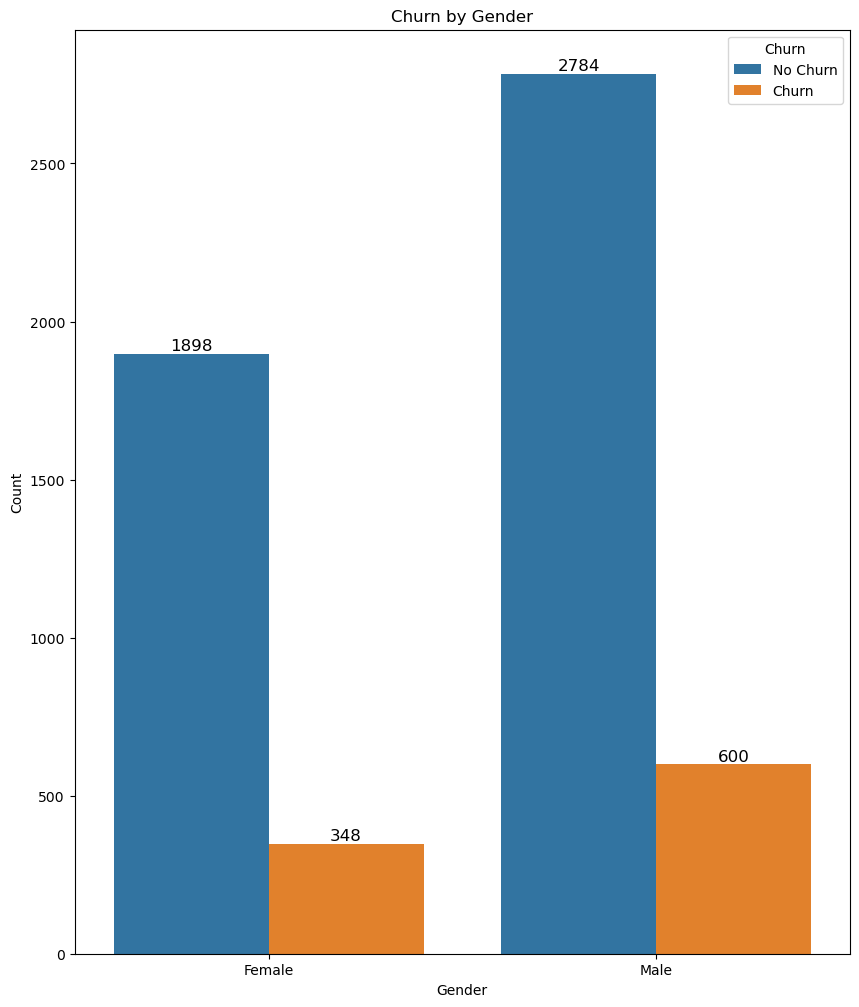

In [29]:
plt.figure(figsize= (10, 12))
ax= sns.countplot(x="Gender", hue="Churn", data=ecommerce)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No Churn", "Churn"])

#Adding labels
for p in ax.patches:
    height= p.get_height()
    ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom", fontsize=12, color="black")
plt.show()

This graph shows that the gender male is the gender that has presented the highest number of churn compared to women. It is 42% higher than that of women.

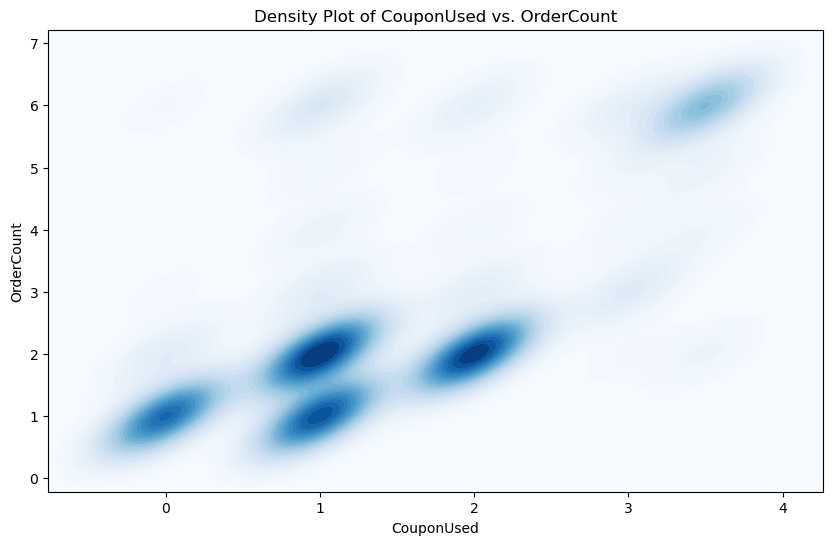

In [30]:
# Create a density plot for CouponUsed vs. OrderCount
plt.figure(figsize=(10, 6))
sns.kdeplot(x="CouponUsed", y="OrderCount", data=ecommerce, cmap="Blues", fill=True, thresh=0, levels=30)
plt.title("Density Plot of CouponUsed vs. OrderCount")
plt.xlabel("CouponUsed")
plt.ylabel("OrderCount")
plt.show()

According to this, there exist more density between the two variables in: one coupon used and one order, one coupon used and two orders, two coupons used and two orders.

##### complain Vs Churn

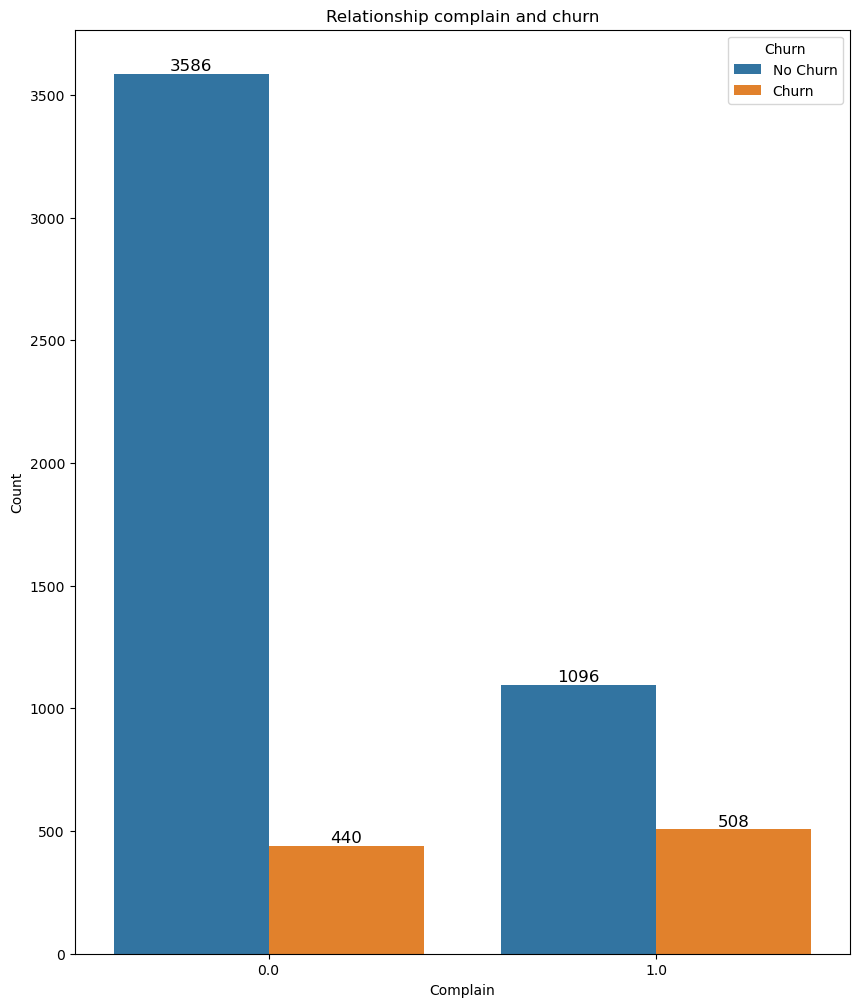

In [31]:
plt.figure(figsize= (10, 12))
ax= sns.countplot(x="Complain", hue="Churn", data=ecommerce)
plt.title("Relationship complain and churn")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No Churn", "Churn"])

#Adding labels
for p in ax.patches:
    height= p.get_height()
    ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom", fontsize=12, color="black")
plt.show()

In [32]:
# Lets check the value counts of each Compains
ecommerce['Complain'].value_counts()

0.0    4026
1.0    1604
Name: Complain, dtype: int64

In [33]:
ecommerce.groupby("Complain")["Churn"].mean() *100

Complain
0.0    10.928962
1.0    31.670823
Name: Churn, dtype: float64

Based in the graph, 0 is not complain and 1 is complain.

in this chart, no compain is 4026 in its total, where 10.92% of the customers churn, while the customers who complained are 1605, where 31.67% stopped using a product/ service or changed to a competitor store.

##### Satisfaction Score Vs Churn

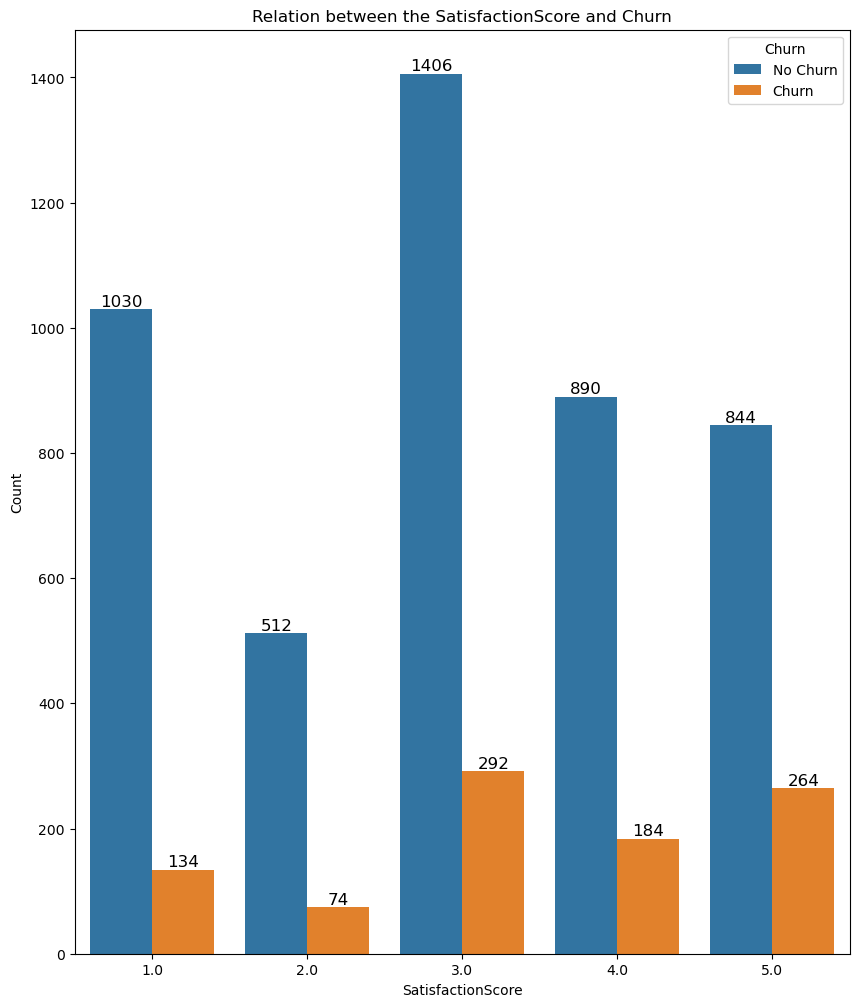

In [34]:
plt.figure(figsize= (10, 12))
ax= sns.countplot(x="SatisfactionScore", hue="Churn", data=ecommerce)
plt.title("Relation between the SatisfactionScore and Churn")
plt.xlabel("SatisfactionScore")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No Churn", "Churn"])

#Adding labels
for p in ax.patches:
    height= p.get_height()
    ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom", fontsize=12, color="black")
plt.show()

In [35]:
# Lets check the value counts of each satisfaction score
ecommerce['SatisfactionScore'].value_counts()

3.0    1698
1.0    1164
5.0    1108
4.0    1074
2.0     586
Name: SatisfactionScore, dtype: int64

According to this, the score 3 was the most popular among the satisfaction score options, followed by 1, 5, 4, and 2; the fist with 1698 answers, 1164, 1108, 1074, and 586 answers, respectively.
On the other hand, analyzing the churn count, the satisfaction score 3 has the highest churn count of 292, followed by satisfaction score 1, 5, 4, and 2 with churn counts of 134, 264, 184, and 74, in the same way.

Now, comparing churn counts across different satisfaction score, we can observe the following:

- SatisfactionScore 3, despite being the most common choice, has a relatively high churn count of 292, indicating that a significant number of customers with this score have churned.
- SatisfactionScore 1, which had fewer responses, also has a notable churn count of 134, suggesting that some customers with low satisfaction have churned.
- SatisfactionScores 5 and 4, which are relatively close in popularity, have churn counts of 264 and 184, respectively.
- SatisfactionScore 2, the least common choice, has a churn count of 74.

Based on this, while satisfaction score 3 is the most common choice, it does not necessarily correlate with lower churn, as it has a relatively high churn count; Lower SatisfactionScores (1 and 2) have lower popularity but still significant churn counts, indicating dissatisfaction among some customers; It's important to investigate the reasons behind churn for each SatisfactionScore category. For example, understanding why some customers with moderate satisfaction (Score 3) have churned may reveal areas for improvement in the eCommerce platform.

## Encoding categorical variables

Encoding categorical variables is important when working with Machine Learning algorithms because most ML models require numerical input data. Categorical variables cannot be directly used as input for many ML algorithms, as these algorithms perform mathematical operations that require numerical data. There exist common methods for encoding categorical variables including one-hot encoding.

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
#perform one-hot encoding for categorical columns
encoder= OneHotEncoder(drop='first', sparse= False)
encoded_categorical= encoder.fit_transform(ecommerce[category_columns])

#Create a DataFrame from the encoded categorical columns
encoded_categorical = encoder.fit_transform(ecommerce[category_columns])

# Create a DataFrame from the encoded categorical data
encoded_categorical_ecommerce = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names(category_columns))

C:\Users\josea\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
encoded_categorical_ecommerce

,Churn_1,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_2,CityTier_3,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
for i in encoded_categorical_ecommerce:
    print(i)
    print()
    print(encoded_categorical_ecommerce[i].value_counts().sort_index(ascending= True))
    print()
    print()

Churn_1

0.0    4682
1.0     948
Name: Churn_1, dtype: int64


PreferredLoginDevice_Mobile Phone

0.0    2865
1.0    2765
Name: PreferredLoginDevice_Mobile Phone, dtype: int64


PreferredLoginDevice_Phone

0.0    4399
1.0    1231
Name: PreferredLoginDevice_Phone, dtype: int64


CityTier_2

0.0    5388
1.0     242
Name: CityTier_2, dtype: int64


CityTier_3

0.0    3908
1.0    1722
Name: CityTier_3, dtype: int64


PreferredPaymentMode_COD

0.0    5265
1.0     365
Name: PreferredPaymentMode_COD, dtype: int64


PreferredPaymentMode_Cash on Delivery

0.0    5481
1.0     149
Name: PreferredPaymentMode_Cash on Delivery, dtype: int64


PreferredPaymentMode_Credit Card

0.0    4129
1.0    1501
Name: PreferredPaymentMode_Credit Card, dtype: int64


PreferredPaymentMode_Debit Card

0.0    3316
1.0    2314
Name: PreferredPaymentMode_Debit Card, dtype: int64


PreferredPaymentMode_E wallet

0.0    5016
1.0     614
Name: PreferredPaymentMode_E wallet, dtype: int64


PreferredPaymentMode_UPI

0.0   

In [41]:
encoded_categorical_ecommerce['Churn_1'].value_counts()

0.0    4682
1.0     948
Name: Churn_1, dtype: int64

In [42]:
# Create a DataFrame containing the numeric columns
numeric_ecommerce = ecommerce[numeric_columns]

# Merge the numeric and encoded categorical DataFrames
merged_ecommerce = pd.concat([numeric_ecommerce, encoded_categorical_ecommerce], axis=1)


In [43]:
merged_ecommerce.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn_1',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

## Predicting

Using Machine Learning to predict churn in business or customer retention context offers several advantages and is common practice in many industries. Some reasons are: data-driven insights, early detection, personalization, segmentation, continous learning, automation, among others.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X= merged_ecommerce.drop(['Churn_1'], axis= 1)
y= merged_ecommerce['Churn_1']

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree - Classification

Accuracy: 0.9671403197158082

Confusion Matrix:
 [[925  16]
 [ 21 164]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       941
         1.0       0.91      0.89      0.90       185

    accuracy                           0.97      1126
   macro avg       0.94      0.93      0.94      1126
weighted avg       0.97      0.97      0.97      1126



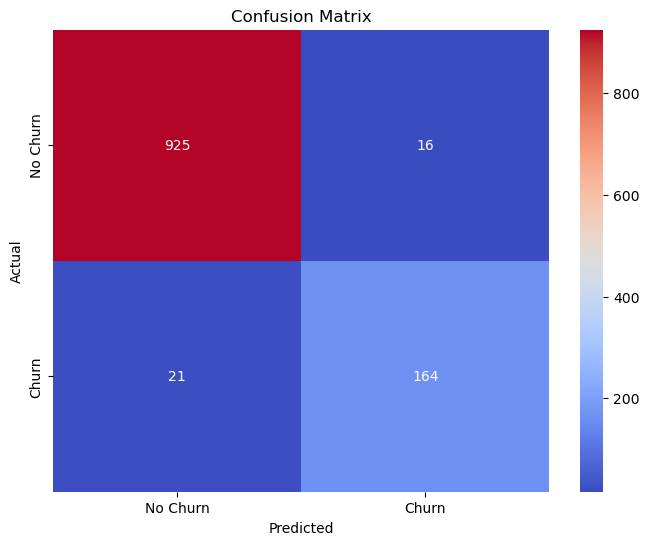

In [46]:
# Create and train a Decision Tree classifier
decision_tree_cl = DecisionTreeClassifier(random_state=42)
decision_tree_cl.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_cl.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The output privided is the result of evaluating the decision tree classifier, on a dataset for binary classification ( 0: no churn, 1: churn).

##### Accuracy: 
In this case, the model has an accuracy of approximately 96.71%. This means that about 96.89% of the predictions made by the model were correct.

##### Confusion matrix:

- True Positives (TP): 164
- True Negatives (TN): 925
- False Positives (FP): 21
- False Negatives (FN): 16
    
The confusion matrix provides a detailed breakdown of the model's predictions. In this case:

- The model correctly predicted 164 instances of class 1 (churn) (True Positives).
- The model correctly predicted 925 instances of class 0 (no churn) (True Negatives).
- The model incorrectly predicted 21 instances as class 1 when they were actually class 0 (False Positives).
- The model incorrectly predicted 16 instances as class 0 when they were actually class 1 (False Negatives).

##### Classification Report:

- Precision: Precision is a measure of the model's ability to correctly classify positive instances. For class 1, the precision is approximately 91%, which means that when the model predicts an instance as class 1, it is correct about 91% of the time.
- Recall: Recall (or sensitivity) is a measure of the model's ability to correctly identify all relevant instances (True Positives). For class 1, the recall is approximately 89%, indicating that the model correctly identifies about 89% of the actual class 1 instances.
- F1-Score: The F1-Score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance. For class 1, the F1-score is approximately 0.90.
- Support: Support is the number of actual occurrences of each class in the dataset. For class 0, there are 941 instances, and for class 1, there are 185 instances.

##### Accuracy and Macro/Micro Averages: 
The accuracy was already explained as an overall measure of correctness. The macro and micro averages provide aggregated metrics across both classes:

- Macro Average: The macro average calculates the metrics (precision, recall, F1-score) for each class separately and then takes the average. It provides equal weight to each class. In this case, the macro average F1-score is approximately 0.94.
- Micro Average: The micro average calculates the metrics by considering the total true positives, false positives, and false negatives across all classes. It provides equal weight to each instance. In this case, the micro average F1-score is approximately 0.97.

In summary, the evaluation indicates that the model has high accuracy and performs well in classifying both class 0 (no churn) and class 1 (churn). It has a good balance of precision and recall for both classes, as reflected in the F1-scores. The confusion matrix and classification report provide a detailed breakdown of the model's performance on each class.

### Decision Tree - Regression

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
# Create and train a Decision Tree Regressor
decision_tree_rl= DecisionTreeRegressor(random_state= 42)
decision_tree_rl.fit(X_train, y_train)

# Make predictions
y_pred= decision_tree_rl.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.03285968028419183
R-squared (R2) Score: 0.7606801275239107


These results show the following:

##### Mean Squared Error (MSE):

The MSE is approximately 0.0328. This means, on average, the squared difference between the predicted values and the actual values is 0.0328. Since this value is relatively low, it suggests that the model's predictions are close to the actual values.

##### R-squared (R2) Score:

It ranges from 0 to 1, where:

R2 = 0: The model does not explain any of the variance in the predicted value.
R2 = 1: The model perfectly explains all the variance in the predicted value.
In this case, the R2 score is approximately 0.7606. This means that about 76.06% of the variance in the predicted value is explained by the features in the model. A higher R2 score indicates that the model is doing a good job of explaining the variability in the data.

In summary, The low MSE indicates that, on average, the model's predictions for churn (0 or 1) are close to the actual churn outcomes, suggesting that the model is making accurate predictions. Also, the relatively high R2 score indicates that the model is successful in explaining a significant portion of the variation in churn, indicating that it captures important factors related to churn prediction.
These metrics, in the context of churn prediction, demonstrate that the model is performing well in making accurate predictions and explaining the factors influencing customer churn.

### Random Forest - Classification

Accuracy: 0.9733570159857904

Confusion Matrix:
 [[940   1]
 [ 29 156]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       941
         1.0       0.99      0.84      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.95      1126
weighted avg       0.97      0.97      0.97      1126



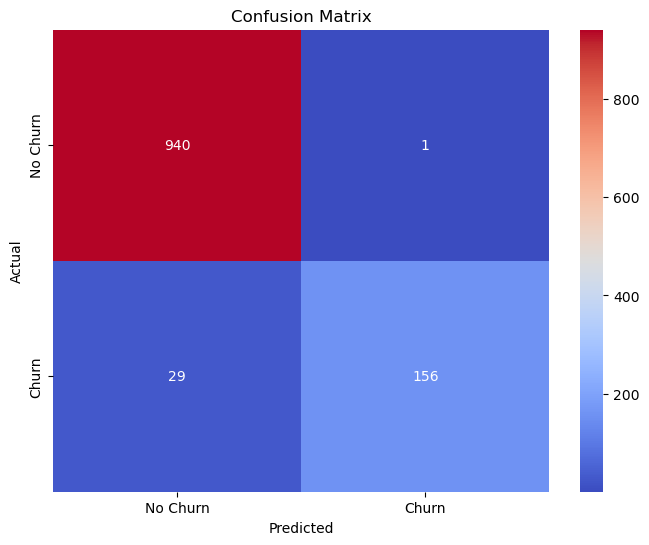

In [50]:
# Create and train a Random Forest Classifier
random_forest_cl = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cl.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_cl.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The output privided is the result of evaluating the random forest classifier, on a dataset for binary classification ( 0: no churn, 1: churn).

##### Accuracy: 

The accuracy is approximately 0.9733 or 97.33%. It means that the model correctly predicted approximately 97.33% of the instances in the dataset.

##### Confusion matrix:

- True Positives (TP): 156
- True Negatives (TN): 940
- False Positives (FP): 1
- False Negatives (FN): 29

##### Classification Report:

- Precision for class 0 (no churn): Precision measures the proportion of true "no churn" predictions among all predictions for class 0. It's 0.97 or 97% in this case.
- Recall for class 0 (no churn): Recall (or sensitivity) measures the proportion of true "no churn" predictions among all actual class 0 instances. It's 1.00 or 100% in this case.
- F1-score for class 0 (no churn): The F1-score is the harmonic mean of precision and recall for class 0. It's 0.98.
- Precision, recall, and F1-score for class 1 (churn): Similar metrics are provided for class 1. Precision is 0.99, recall is 0.84, and the F1-score is 0.91.

##### Accuracy and Macro/Micro Averages: 

- Macro average (macro avg): computes the unweighted average of precision, recall, and F1-score across all classes. It's used when class imbalance is a concern.
- Weighted average (weighted avg): computes the average, weighted by the number of instances for each class. It accounts for class imbalance and is often a more appropriate metric.

In summary, the classification results indicate that the model is performing well with high accuracy. It correctly predicts "no churn" instances with high precision and recall. However, for the "churn" class, while precision is almos perfect (0.99), recall is slightly lower (0.84), indicating that the model may miss some instances of churn but is highly accurate when it predicts "churn." Overall, the model provides a strong balance between precision and recall, achieving a high F1-score.

### Random Forest - Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error (MSE): 0.02486065719360568
R-squared (R2) Score: 0.8189376993997185


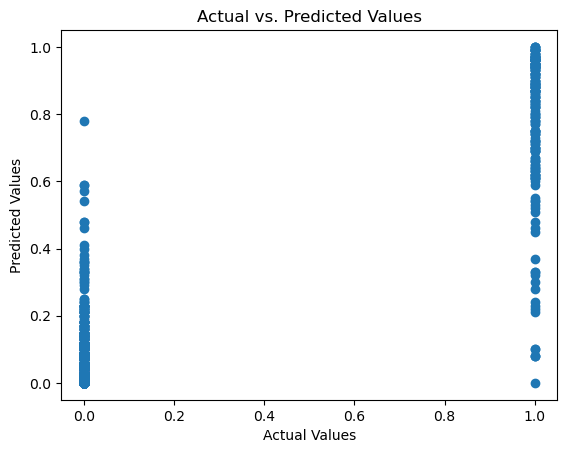

In [53]:
# Create and train a Random Forest Regressor
random_forest_rl = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_rl.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_rl.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Plot the predicted vs. actual values (for visualization)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

These results show the following:

##### Mean Squared Error (MSE):

In the context of predicting churn, a low MSE (approximately 0.0248) means that, on average, the squared difference between the model's predictions and the actual churn outcomes (1 or 0) is relatively small.
This suggests that the model's predictions are generally close to the actual churn outcomes, indicating accurate predictions for whether a customer will churn or not.

##### R-squared (R2) Score:

An R2 score of approximately 0.8189 means that about 81.89% of the variation in churn (1 or 0) is accounted for by the features used in the model.
This indicates that the model effectively captures and explains a significant portion of the factors influencing whether a customer churns or not.

In summary, the low MSE indicates that, on average, the model's predictions for churn (1 or 0) are close to the actual churn outcomes, suggesting that the model is making accurate predictions. Moreover, the relatively high R2 score indicates that the model is successful in explaining a significant portion of the variation in churn (1 or 0), indicating that it captures important factors related to churn prediction.
These metrics affirm that the Random Forest Classification model is performing well in accurately predicting customer churn and effectively capturing the factors influencing churn within the dataset.

### Logistic Regression model

In [54]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8996447602131439

Confusion Matrix:
 [[918  23]
 [ 90  95]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       941
         1.0       0.81      0.51      0.63       185

    accuracy                           0.90      1126
   macro avg       0.86      0.74      0.78      1126
weighted avg       0.89      0.90      0.89      1126



C:\Users\josea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


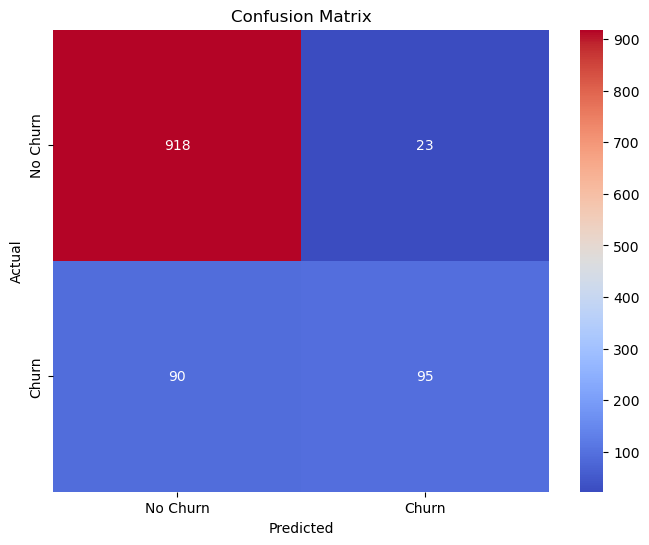

In [55]:
# Create and train a Logistic Regression model
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The output privided is the result of evaluating the logistic regression( 0: no churn, 1: churn).

##### Accuracy: 

The accuracy is approximately 0.899 or 89.9%. It means that the model correctly predicted approximately 89.9% of the instances in the dataset.

##### Confusion matrix:

- True Positives (TP): 95
- True Negatives (TN): 918
- False Positives (FP): 23
- False Negatives (FN): 90

##### Classification Report:

- Precision for class 0 ("not churn"): Precision measures the proportion of true "not churn" predictions among all predictions for class 0. It's 0.91 or 91% in this case.
- Recall for class 0 ("not churn"): Recall (or sensitivity) measures the proportion of true "not churn" predictions among all actual class 0 instances. It's 0.98 or 98% in this case.
- F1-score for class 0 ("not churn"): The F1-score is the harmonic mean of precision and recall for class 0. It's 0.94.
- Precision, recall, and F1-score for class 1 ("churn"): Similar metrics are provided for class 1. Precision is 0.81, recall is 0.51, and the F1-score is 0.63.

##### Accuracy and Macro/Micro Averages: 

- Macro average (macro avg): computes the unweighted average of precision, recall, and F1-score across all classes. It's used when class imbalance is a concern.
- Weighted average (weighted avg): computes the average, weighted by the number of instances for each class. It accounts for class imbalance and is often a more appropriate metric.

In summary, the classification results indicate that the logistic regression model has reasonable accuracy but is better at predicting "not churn" (class 0) than "churn" (class 1). The model correctly identifies a high proportion of "not churn" instances with high precision and recall but has lower recall for "churn" instances, indicating that it may miss some instances of churn. The F1-scores provide a balanced view of precision and recall for both classes.

## Feature Importance

I am using the Random Forest Regression to feature importance. This means, to see which features (variables) were the ones which affected the churn in a possitive and negative way.

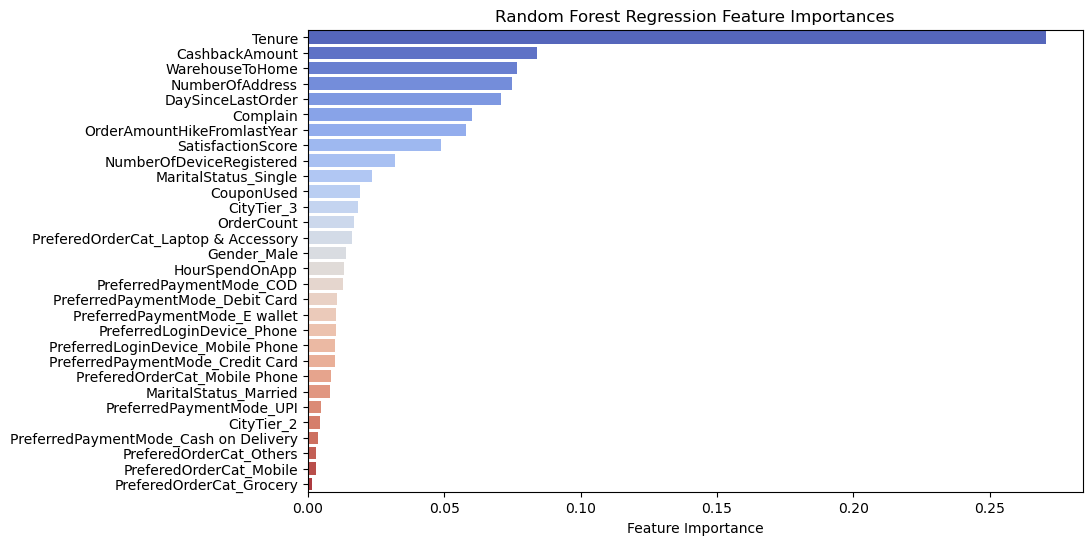

In [56]:
# Get the feature importances from the trained Random Forest Regression model
feature_importances = random_forest_rl.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, orient='h', palette='coolwarm')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regression Feature Importances')
plt.show()

In [57]:
# Get the feature importances from the trained Random Forest Regression model
feature_importances = random_forest_rl.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the top 3 features with the highest feature importances
print("Top 3 Features with Highest Feature Importances:")
for i in range(3):
    print(f"{sorted_feature_names[i]}: {sorted_feature_importances[i]}")

Top 3 Features with Highest Feature Importances:
Tenure: 0.2705326815168049
CashbackAmount: 0.08389145508109987
WarehouseToHome: 0.07663011110708233


In the context of a church prediction model, feature importance refers to the measure of how much each variable contributes to the model's ability to predict whether a customer will churn or not.

- Positive feature: Suggests that an increase in a feature is associated with a higher likelihood of churn.
- Negative feature: Suggests that an increase in a feature is associated with a lower likelihood of churn

In this way, the top 3 of variables that affect mostly to churn are: Tenure, Cash back amount, Warehouse to home.

## Conclusion and recomendations

### Conclusion

In this e-commerce case study, I observed that the churn rate, representing customers who stopped using the service, stands at 16.84%, while the non-churn rate is significantly higher at 83.16%. This suggests that a majority of customers are satisfied and loyal to the business.

To delve into the key factors affecting churn, I focused on three variables: Gender, Complain, and Satisfaction Score.
Firstly, in terms of gender, male customers showed a higher churn rate compared to female customers. The churn rate among males is 42% higher than that among females, contributing to 63.2% of the total churn cases.
Secondly, regarding customer complaints, there were 4026 cases of no complaints, with a churn rate of 10.92%, while among the 1605 customers who complained, 31.67% stopped using the service or switched to a competitor.
Lastly, when analyzing Satisfaction Score, I found an interesting trend. Despite Satisfaction Score 3 being the most common choice, it does not necessarily correlate with lower churn. It actually has a relatively high churn count. Lower Satisfaction Scores (1 and 2) are less popular but still exhibit significant churn counts, indicating dissatisfaction among some customers.

In terms of predictive models:

- The Random Forest Classification model achieved the highest accuracy at 97.51% and demonstrated good precision and recall for both churn and non-churn classes.
- Decision Tree Classification and Logistic Regression models had slightly lower accuracy but still provided reasonable classification results.
- Decision Tree Regression and Random Forest Regression models excelled at explaining the variation in the target variable.

If the business aims to understand the accuracy of predicting churn and the factors influencing it, regression models can offer valuable insights. In this context, I selected the Random Forest Regressor model. The top three variables that strongly influence churn are identified as Tenure, Cash back amount, Warehouse to home.


### Recomendations

Some of the recomendations found on base what we know about the business (just data), are:

- Improve Customer Retention Strategies: Given the high impact of churn on the business, it's essential to focus on retaining existing customers. Develop and implement targeted retention strategies, such as loyalty programs, personalized offers, and proactive customer support. Also, analyze the factors that contribute to customer churn and address them. For instance, if long WarehouseToHome times are a significant factor, consider optimizing the delivery process.

- Enhance Customer Satisfaction: Customer satisfaction plays a crucial role in reducing churn. Continue to collect and analyze customer feedback to identify areas where improvements are needed. Furthermore, invest in initiatives to improve customer satisfaction, such as improving the mobile app experience, addressing complaints promptly, and providing quality customer service.

- Data-Driven Marketing and Segmentation: Leverage the insights gained from the analysis to drive targeted marketing campaigns. Segment your customer base based on factors like preferred payment mode, order history, and satisfaction score. Additionally, use predictive modeling to identify customers at high risk of churn and tailor marketing efforts to retain them. Offer incentives, discounts, or special promotions to incentivize these customers to stay.
